In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

데이터를 간략하게 살펴보고 

불필요한 column, 중복, 결측치 등을 확인 후 처리한다.

In [3]:
df = pd.read_csv('vgames2.csv')

In [4]:
df.shape

(16598, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [6]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [7]:
df = df.iloc[:,1:] #불필요한 column 제거

In [8]:
df[df.duplicated()] #중복값 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [9]:
df[df['Name'] == 'Wii de Asobu: Metroid Prime'] #어떤 index가 중복되었는지 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [10]:
df = df.drop_duplicates() #중복값 제거
df = df.reset_index(drop=True)
df.shape

(16597, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  object 
 6   EU_Sales     16597 non-null  object 
 7   JP_Sales     16597 non-null  object 
 8   Other_Sales  16597 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [12]:
df.isna().sum() / df.shape[0] # 결측치가 전체 데이터의 약 2% 차지하므로 삭제해도 무방

Name           0.000000
Platform       0.000000
Year           0.016268
Genre          0.003013
Publisher      0.003495
NA_Sales       0.000000
EU_Sales       0.000000
JP_Sales       0.000000
Other_Sales    0.000000
dtype: float64

In [13]:
df = df.dropna(axis=0) # 결측치 데이터 삭제
df = df.reset_index(drop=True)
df.shape

(16241, 9)

데이터 값과 type을 용도에 맞게 수정한다.

Year column에 2000, 1900년도가 결측된 데이터가 존재함.

알맞게 2000 or 1900을 채워줌.

In [ ]:
df['Year'] = df['Year'].astype(int)

for i in range(len(df)):
  if df['Year'][i] < 23: # 한 자리 수는 모두 2000년 이후라는 것을 검색하여 찾아냄.
    df['Year'][i] = 2000 + df['Year'][i]
  elif df['Year'][i] < 100 and df['Year'][i] >= 23:
    df['Year'][i] = 1900 + df['Year'][i]

df['Year'] = df['Year'].astype(object)
df.info()

In [ ]:
df.head()

In [16]:
df['Year'].isna().sum()

0

Sales 데이터 중 M -> 백만단위, K -> 천단위, 나머지 -> 백단위

수정하여 int 형식으로 변환

In [17]:
def M_K_index(x, name, data):
  return data[data[name].str.contains(x)].index

In [18]:
NA_M = M_K_index('M', 'NA_Sales', data=df)
NA_K = M_K_index('K', 'NA_Sales', data=df)
EU_M = M_K_index('M', 'EU_Sales', data=df)
EU_K = M_K_index('K', 'EU_Sales', data=df)
JP_M = M_K_index('M', 'JP_Sales', data=df)
JP_K = M_K_index('K', 'JP_Sales', data=df)
Ot_M = M_K_index('M', 'Other_Sales', data=df)
Ot_K = M_K_index('K', 'Other_Sales', data=df)

In [19]:
def M_K_replace(x, name, data):
  data[name] = data[name].str.replace(x, '')

In [20]:
M_K_replace('M', 'NA_Sales', data=df)
M_K_replace('K', 'NA_Sales', data=df)
M_K_replace('M', 'EU_Sales', data=df)
M_K_replace('K', 'EU_Sales', data=df)
M_K_replace('M', 'JP_Sales', data=df)
M_K_replace('K', 'JP_Sales', data=df)
M_K_replace('M', 'Other_Sales', data=df)
M_K_replace('K', 'Other_Sales', data=df)

df['NA_Sales'] = df['NA_Sales'].astype(float)
df['EU_Sales'] = df['EU_Sales'].astype(float)
df['JP_Sales'] = df['JP_Sales'].astype(float)
df['Other_Sales'] = df['Other_Sales'].astype(float)

In [21]:
def change(K_name, M_name, name, data):
  for i in K_name:
    data[name][i] = data[name][i]*1000

  for i in M_name:
    data[name][i] = data[name][i]*1000000

  for i in range(len(data[name])):
    if data[name][i] < 1000:
      data[name][i] = data[name][i]*100

  data[name] = data[name].astype(int)

In [ ]:
change(NA_K, NA_M, 'NA_Sales', data=df)
change(EU_K, EU_M, 'EU_Sales', data=df)
change(JP_K, JP_M, 'JP_Sales', data=df)
change(Ot_K, Ot_M, 'Other_Sales', data=df)

In [23]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [ ]:
df.info()

In [25]:
df.groupby('Genre')['NA_Sales'].mean()

Genre
Action          6652.367284
Adventure        607.332019
Fighting        1654.953293
Misc            2456.301606
Platform        6029.786942
Puzzle           162.798587
Racing          9831.221493
Role-Playing    1113.785666
Shooter         9754.829687
Simulation      3850.845154
Sports          4961.093954
Strategy        1579.481315
Name: NA_Sales, dtype: float64

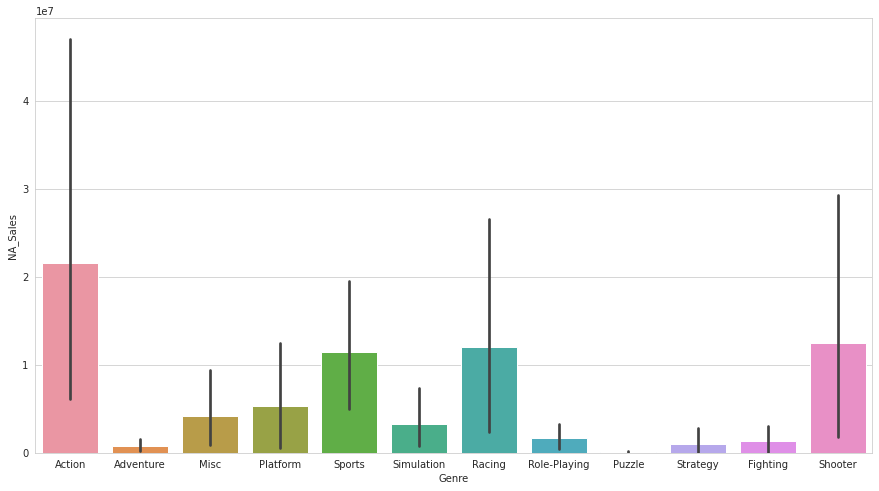

In [28]:
sns.set_style('whitegrid')

plt.figure(figsize = (15,8))
sns.barplot(x='Genre', y='NA_Sales', data=df, estimator=sum)
plt.show()

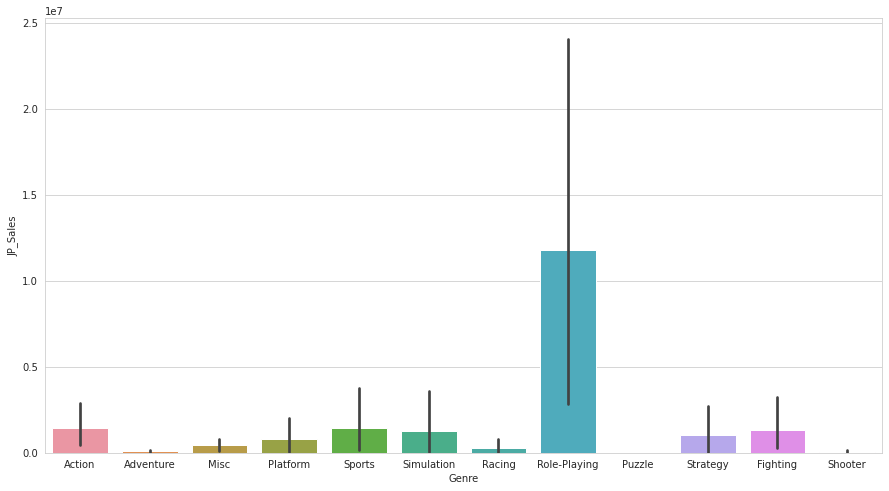

In [32]:
plt.figure(figsize = (15,8))
sns.barplot(x='Genre', y='JP_Sales', data=df, estimator=sum)
plt.show()

In [122]:
df[df['Genre'] == 'Platform'].sort_values(by='Total_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9640,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,2930000,125,83,20,2930228
6322,Super Mario 64,N64,1996,Platform,Nintendo,691,2850000,191,23,2850905
9957,Crash Bandicoot: The Wrath of Cortex,PS2,2001,Platform,Universal Interactive,206,2290000,24,82,2290312
7558,Super Mario Maker,WiiU,2015,Platform,Nintendo,1180000,87,93,20,1180200
494,New Super Luigi U,WiiU,2013,Platform,Nintendo,127,620000,18,16,620161
7914,Sonic Colors,Wii,2010,Platform,Sega,96,610000,1,16,610113
13419,Ice Climber,NES,1985,Platform,Nintendo,460000,10,92,2,460104
937,Kirby's Epic Yarn,Wii,2010,Platform,Nintendo,147,9,450000,11,450167
16222,Gex: Enter the Gecko,PS,1998,Platform,BMG Interactive Entertainment,320000,22,0,4,320026
9641,Frozen: Olaf's Quest,3DS,2013,Platform,Disney Interactive Studios,27,260000,0,5,260032


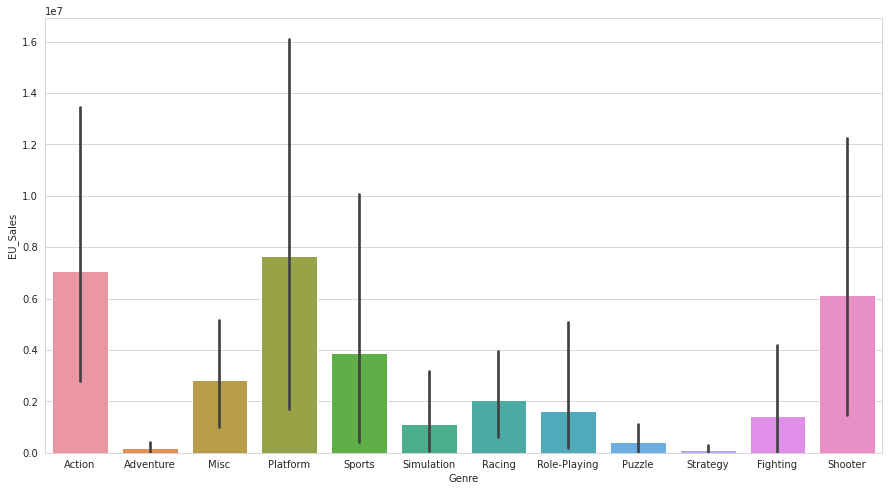

In [34]:
plt.figure(figsize = (15,8))
sns.barplot(x='Genre', y='EU_Sales', data=df, estimator=sum)
plt.show()

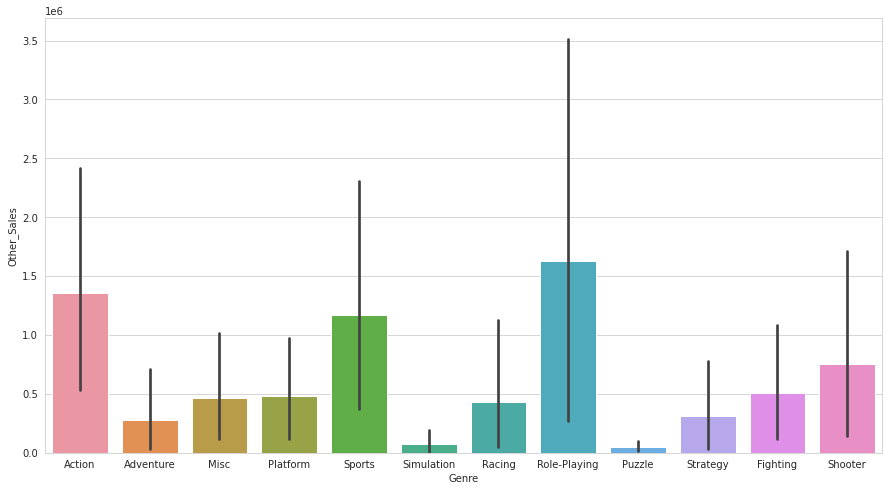

In [33]:
plt.figure(figsize = (15,8))
sns.barplot(x='Genre', y='Other_Sales', data=df, estimator=sum)
plt.show()

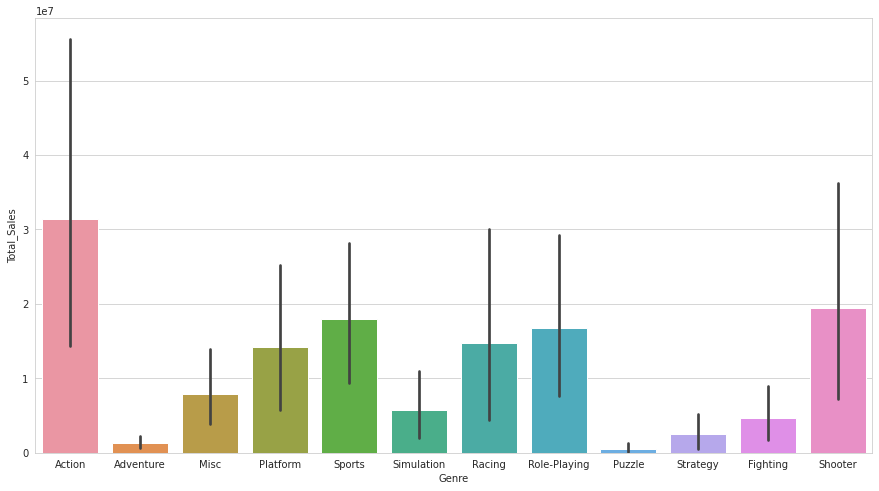

In [131]:
plt.figure(figsize = (15,8))
sns.barplot(x='Genre', y='Total_Sales', data=df, estimator=sum)
plt.show()

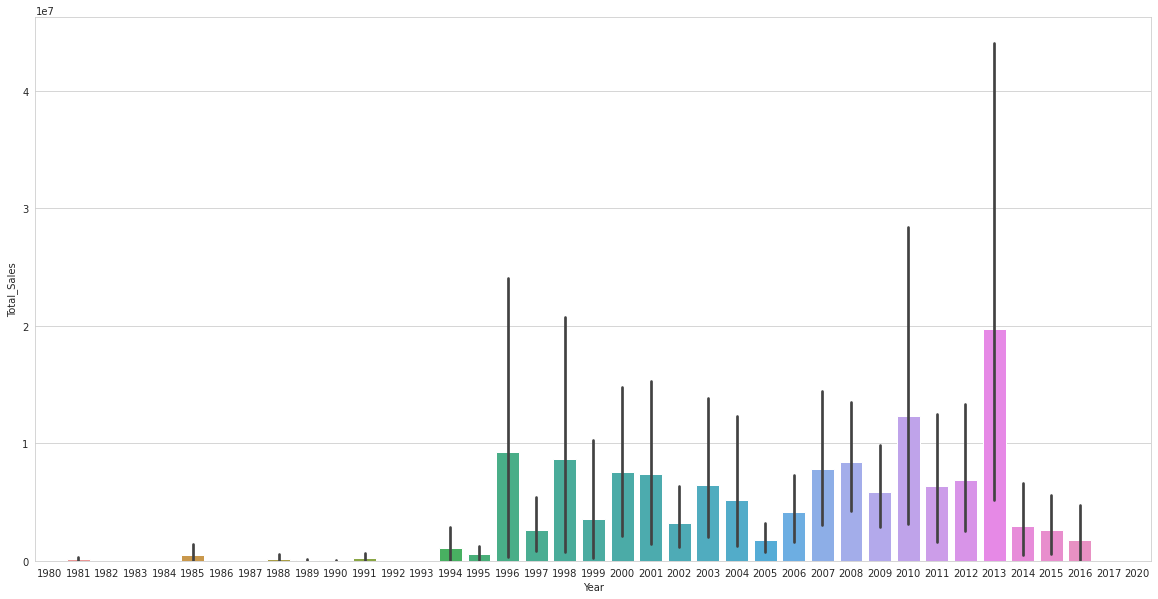

In [135]:
plt.figure(figsize = (20,10))
sns.barplot(x='Year', y='Total_Sales', data=df, estimator=sum)
plt.show()

In [26]:
df.shape

(16241, 10)

In [27]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4,0,0,0,4
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17,0,0,1,18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,2,0,2
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4,0,0,0,4
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12,9,0,4,25


장르별 총 판매량을 지표로한 데이터 분석

In [29]:
df[df['Genre'] == 'Shooter']['Total_Sales'].mean()

15195.69375

In [30]:
df[df['Genre'] == 'Sports']['Total_Sales'].mean()

7794.119182253154

In [31]:
df[df['Genre'] == 'Action']['Total_Sales'].mean()

9706.189814814816

In [44]:
df[df['Genre'] == 'Platform'][['Year', 'Genre', 'Publisher', 'Total_Sales']].sort_values(by='Total_Sales', ascending=False).head(10)

,Year,Genre,Publisher,Total_Sales
9640,2003,Platform,Nintendo,2930228
6322,1996,Platform,Nintendo,2850905
9957,2001,Platform,Universal Interactive,2290312
7558,2015,Platform,Nintendo,1180200
494,2013,Platform,Nintendo,620161
7914,2010,Platform,Sega,610113
13419,1985,Platform,Nintendo,460104
937,2010,Platform,Nintendo,450167
16222,1998,Platform,BMG Interactive Entertainment,320026
9641,2013,Platform,Disney Interactive Studios,260032


In [47]:
df[df['Genre'] == 'Platform']['Total_Sales'].sum()

14191361

In [54]:
round(df[(df['Publisher'] == 'Nintendo') & (df['Genre'] == 'Platform')]['Total_Sales'].sum() / df[df['Genre'] == 'Platform']['Total_Sales'].sum(), 2)
# 플랫폼 장르에서 닌텐도 판매량이 차지하는 비율

0.61

In [63]:
df_Action= df[df['Genre'] == 'Action'].sort_values(by='Total_Sales', ascending=False).head(10).reset_index(drop=True)

In [68]:
#판매량 순위를 위한 전처리
df_Action['Rank'] = range(10,0,-1)
df_sports['Rank'] = range(10,0,-1)
df_shooter['Rank'] = range(10,0,-1)

In [62]:
df_sports= df[df['Genre'] == 'Sports'].sort_values(by='Total_Sales', ascending=False).head(10).reset_index(drop=True)

In [59]:
df_shooter = df[df['Genre'] == 'Shooter'].sort_values(by='Total_Sales', ascending=False).head(10).reset_index(drop=True)

In [157]:
df_compare = df_Action.append(df_sports)
df_compare = df_compare.append(df_shooter).reset_index(drop=True)
df_compare = df_compare[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Total_Sales']]
df_compare[df_compare['Genre'] == 'Action']

,Name,Platform,Year,Genre,Publisher,Total_Sales
0,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630675
1,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100350
2,Assassin's Creed III,PS3,2012,Action,Ubisoft,2560393
3,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008,Action,LucasArts,1230044
4,Harry Potter and the Chamber of Secrets,GBA,2002,Action,Electronic Arts,1210078
5,LEGO Star Wars II: The Original Trilogy,DS,2006,Action,LucasArts,960012
6,WWE '13,X360,2012,Action,THQ,720056
7,Harry Potter and the Sorcerer's Stone,GBA,2001,Action,Electronic Arts,660103
8,LEGO Indiana Jones: The Original Adventures,DS,2008,Action,Activision,610163
9,Medal of Honor: Warfighter,X360,2012,Action,Electronic Arts,580058


In [158]:
df_compare[df_compare['Genre'] == 'Sports']

,Name,Platform,Year,Genre,Publisher,Total_Sales
10,FIFA 14,X360,2013,Sports,Electronic Arts,2930139
11,Tony Hawk's Pro Skater 3,PS2,2001,Sports,Activision,2660176
12,NBA 2K12,PS3,2011,Sports,Take-Two Interactive,1610050
13,Deca Sports,Wii,2008,Sports,Konami Digital Entertainment,1130140
14,Gold's Gym: Cardio Workout,Wii,2008,Sports,Ubisoft,1110019
15,Mario Tennis,N64,2000,Sports,Nintendo,1060125
16,Mario Sports Mix,Wii,2010,Sports,Nintendo,900121
17,Madden NFL 2001,N64,2000,Sports,Electronic Arts,600004
18,FIFA Soccer 11,X360,2010,Sports,Electronic Arts,400313
19,NFL Street 2,XB,2004,Sports,Electronic Arts,360013


In [159]:
df_compare[df_compare['Genre'] == 'Shooter']

,Name,Platform,Year,Genre,Publisher,Total_Sales
20,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7030284
21,Battlefield 3,X360,2011,Shooter,Electronic Arts,2130521
22,Call of Duty: Ghosts,PS4,2013,Shooter,Activision,1780185
23,Call of Duty: Advanced Warfare,XOne,2014,Shooter,Activision,1530360
24,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1300289
25,Bulletstorm,X360,2011,Shooter,Electronic Arts,930009
26,Call of Duty: Modern Warfare 2,PC,2009,Shooter,Activision,790010
27,Duke Nukem: Time to Kill,PS,1998,Shooter,Take-Two Interactive,770061
28,Destiny,PS3,2014,Shooter,Activision,660106
29,Medal of Honor: Airborne,X360,2007,Shooter,Electronic Arts,450066


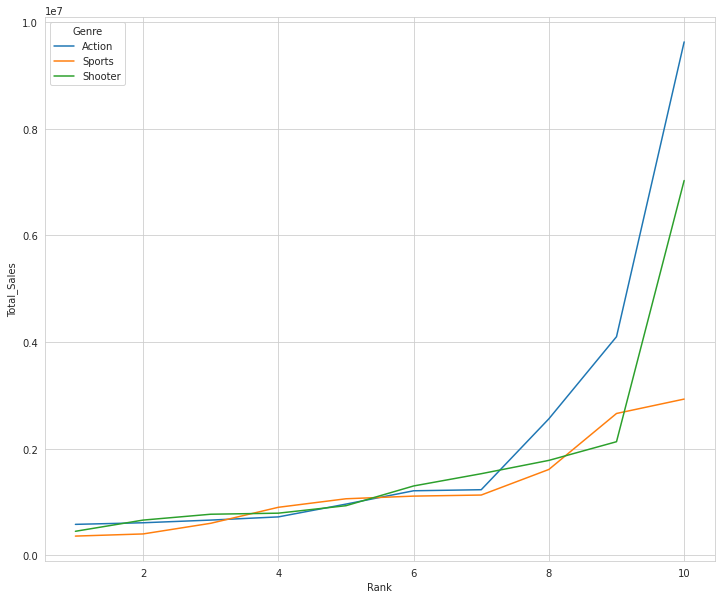

In [73]:
#판매량을 나타낸 그래프
fig = plt.figure(figsize=(12, 10))
fig.set_facecolor('white')
sns.lineplot(data=df_compare, x='Rank', y='Total_Sales', 
             hue='Genre'
             )
plt.show()

In [90]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.groupby(['Genre', 'Year'])['Total_Sales'].sum()

In [135]:
#정규화 과정을 위한 전처리
df_Act = df[df['Genre'] == 'Action']
df_Spr = df[df['Genre'] == 'Sports']
df_Sht = df[df['Genre'] == 'Shooter']

In [136]:
df_Act = df_Act.groupby('Year')['Total_Sales'].sum()
df_Spr = df_Spr.groupby('Year')['Total_Sales'].sum()
df_Sht = df_Sht.groupby('Year')['Total_Sales'].sum()

In [137]:
df_Act = pd.DataFrame(df_Act, columns=['Total_Sales'])
df_Spr = pd.DataFrame(df_Spr, columns=['Total_Sales'])
df_Sht = pd.DataFrame(df_Sht, columns=['Total_Sales'])

In [138]:
print(df_Act.shape, df_Spr.shape, df_Sht.shape)

(38, 1) (36, 1) (36, 1)


In [ ]:
fig = plt.figure(figsize=(12, 10))
sns.lineplot(data=df_Act, x='Year', y='Total_Sales')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 10))
sns.lineplot(data=df_Spr, x='Year', y='Total_Sales')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 10))
sns.lineplot(data=df_Sht, x='Year', y='Total_Sales')
plt.show()

In [139]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df_Act)

df_Act_Norm = pd.DataFrame(df_minmax, columns = ['Total_Sales_Norm'])

In [140]:
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df_Spr)

df_Spr_Norm = pd.DataFrame(df_minmax, columns = ['Total_Sales_Norm'])

In [141]:
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df_Sht)

df_Sht_Norm = pd.DataFrame(df_minmax, columns = ['Total_Sales_Norm'])

In [142]:
df_Act = pd.DataFrame(df_Act, columns=['Total_Sales'])
df_Act.reset_index(inplace=True)
df_Spr = pd.DataFrame(df_Spr, columns=['Total_Sales'])
df_Spr.reset_index(inplace=True)
df_Sht = pd.DataFrame(df_Sht, columns=['Total_Sales'])
df_Sht.reset_index(inplace=True)

In [143]:
df_Act['Total_Sales_Norm'] = df_Act_Norm
df_Spr['Total_Sales_Norm'] = df_Spr_Norm
df_Sht['Total_Sales_Norm'] = df_Sht_Norm

In [ ]:
df_Sht

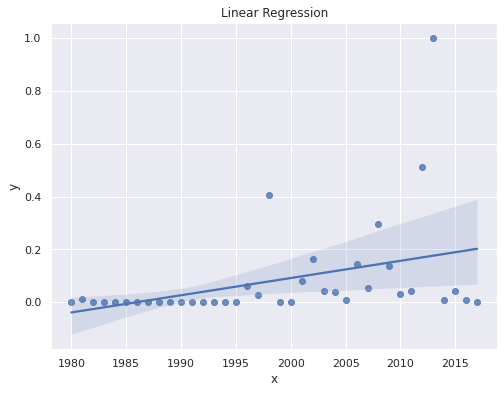

In [151]:
#정규화 전처리 후 나타낸 선형회귀 그래프
plt.figure(figsize=(8,6))

sns.set_theme(color_codes=True)

sns.regplot(x="Year", y="Total_Sales_Norm", data=df_Act)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression');

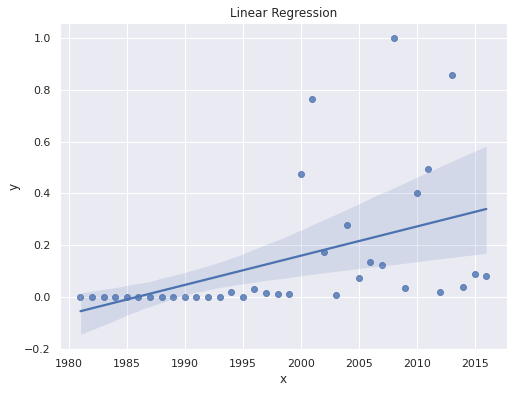

In [152]:
plt.figure(figsize=(8,6))

sns.set_theme(color_codes=True)

sns.regplot(x="Year", y="Total_Sales_Norm", data=df_Spr)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression');

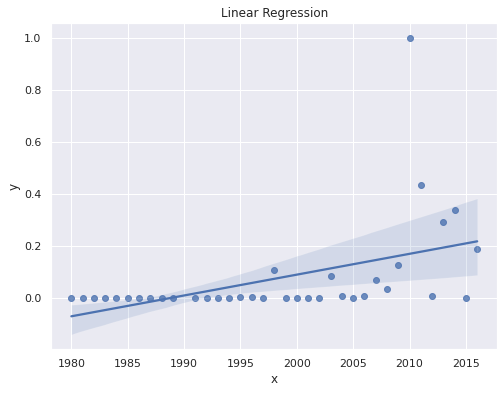

In [153]:
plt.figure(figsize=(8,6))

sns.set_theme(color_codes=True)

sns.regplot(x="Year", y="Total_Sales_Norm", data=df_Sht)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression');

가설검정


In [ ]:
df_act_hp = df[df['Genre'] == 'Action']
df_act_hp

In [40]:
np.random.seed(42)

action_means, sports_means, shooter_means = [], [], []

for _ in range(10000):
  sample1 = df[df['Genre'] == 'Action'].sample(100, replace=True)
  action_means.append(sample1['Total_Sales'].mean())

  sample2 = df[df['Genre'] == 'Sports'].sample(100, replace=True)
  sports_means.append(sample2['Total_Sales'].mean())

  sample3 = df[df['Genre'] == 'Shooter'].sample(100, replace=True)
  shooter_means.append(sample3['Total_Sales'].mean())


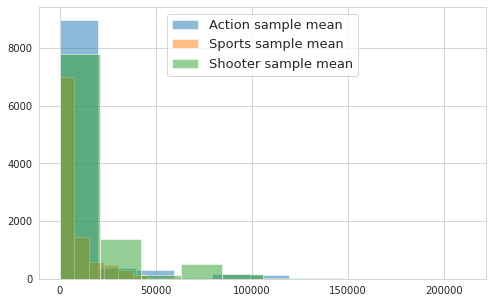

In [41]:
plt.figure(figsize=(8,5))
plt.hist(action_means, alpha = 0.5, label='Action sample mean')
plt.hist(sports_means, alpha = 0.5, label = 'Sports sample mean')
plt.hist(shooter_means, alpha = 0.5, label = 'Shooter sample mean')
plt.legend(loc=9, fontsize=13)
plt.show()